In [83]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf

In [17]:
df_1 = pd.read_csv('churn.csv')
df_1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df_1.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [19]:
df_1['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [20]:
df_1.drop(['CustomerId','Surname'],axis='columns',inplace=True)

In [21]:
df_1.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
df_1['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [27]:
df_1['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [28]:
df_1.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [36]:
df_1.drop('RowNumber',axis='columns',inplace=True)

In [37]:
df_1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [43]:
df_1['EstimatedSalary'].isna().value_counts()

False    10000
Name: EstimatedSalary, dtype: int64

In [46]:
df_1['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [47]:
df_2 = pd.get_dummies(data=df_1,columns=['Geography','NumOfProducts'])

In [48]:
df_2.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,0,42,2,0.00,1,1,101348.88,1,1,0,0,1,0,0,0
1,608,0,41,1,83807.86,0,1,112542.58,0,0,0,1,1,0,0,0
2,502,0,42,8,159660.80,1,0,113931.57,1,1,0,0,0,0,1,0
3,699,0,39,1,0.00,0,0,93826.63,0,1,0,0,0,1,0,0
4,850,0,43,2,125510.82,1,1,79084.10,0,0,0,1,1,0,0,0


In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [51]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
df_2[cols_to_scale] = scaler.fit_transform(df_2[cols_to_scale])

In [52]:
df_2

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,0.538,0,0.324324,0.2,0.000000,1,1,0.506735,1,1,0,0,1,0,0,0
1,0.516,0,0.310811,0.1,0.334031,0,1,0.562709,0,0,0,1,1,0,0,0
2,0.304,0,0.324324,0.8,0.636357,1,0,0.569654,1,1,0,0,0,0,1,0
3,0.698,0,0.283784,0.1,0.000000,0,0,0.469120,0,1,0,0,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,1,1,0.395400,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,1,0,0.481341,0,1,0,0,0,1,0,0
9996,0.332,1,0.229730,1.0,0.228657,1,1,0.508490,0,1,0,0,1,0,0,0
9997,0.718,0,0.243243,0.7,0.000000,0,1,0.210390,1,1,0,0,1,0,0,0
9998,0.844,1,0.324324,0.3,0.299226,1,0,0.464429,1,0,1,0,0,1,0,0


In [54]:
X = df_2.drop('Exited',axis='columns')
y = df_2['Exited']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [56]:
X_train.shape

(8000, 15)

In [57]:
X_test.shape

(2000, 15)

In [58]:
len(X_train.columns)

15

In [72]:
model = keras.Sequential([
    keras.layers.Dense(15,input_shape=(15,),activation='relu'),
    keras.layers.Dense(12,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4870 - accuracy: 0.7789
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3992 - accuracy: 0.8253
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3794 - accuracy: 0.8370
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3711 - accuracy: 0.8404
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3690 - accuracy: 0.8424
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3656 - accuracy: 0.8428
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3643 - accuracy: 0.8447
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3627 - accuracy: 0.8464
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3608 - accuracy: 0.8455
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3603 - accura

In [73]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3617 - accuracy: 0.8610


[0.3617226779460907, 0.8610000014305115]

In [77]:
predict = model.predict(X_test)
predict[:5]

63/63 [==============================] - 0s 1ms/step


array([[0.2167794 ],
       [0.20604013],
       [0.04592213],
       [0.0214021 ],
       [0.05798101]], dtype=float32)

In [78]:
y_test[:5]

6945    0
3055    0
1398    1
9907    0
4917    0
Name: Exited, dtype: int64

In [76]:
y_pred = []
for element in predict:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [79]:
y_pred[:20]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [80]:
y_test[:20]

6945    0
3055    0
1398    1
9907    0
4917    0
8810    0
4015    0
316     1
570     0
1347    0
7541    0
3425    0
3723    0
85      0
9565    1
5023    0
8034    0
294     0
7735    1
8011    0
Name: Exited, dtype: int64

In [81]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1609
           1       0.70      0.50      0.59       391

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Text(95.72222222222221, 0.5, 'Truth')

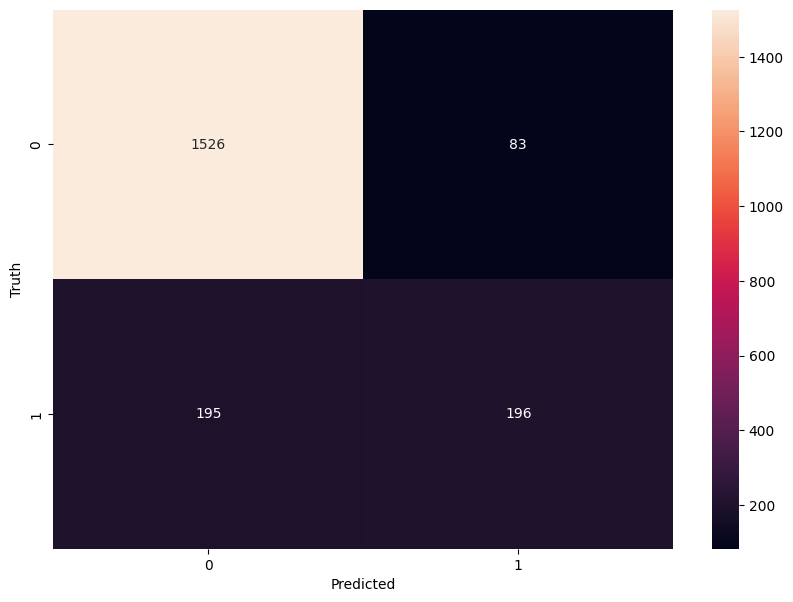

In [84]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')